# E4.9_Part_2

In [2]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Creating a path
path = r'C:\Users\zwier\anaconda_projects\15-01-2025 Instacart Basket Analysis'

In [6]:
# importing df
instacart_merged = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'instacart_merged.pkl'))

# If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

### Bar chart

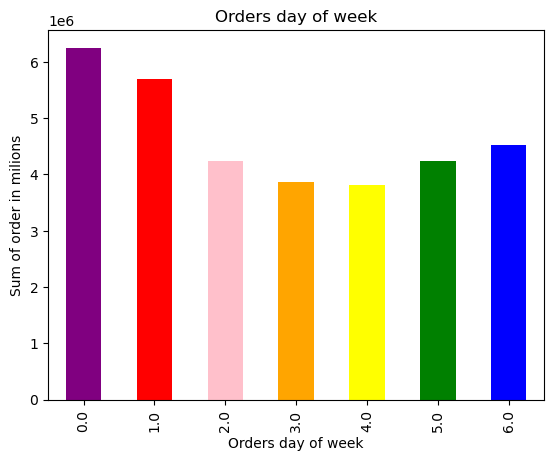

In [32]:
# Creating a Bar chart and adding Colors to the bar chart
bar = instacart_merged['orders_day_of_week'].value_counts().sort_index().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

plt.title('Orders day of week')
plt.xlabel('Orders day of week')
plt.ylabel('Sum of order in milions')

# Show the plot
plt.show()

In [19]:
# Lets dort with 'prices' index largest to smallest)
instacart_merged['prices'].value_counts().sort_index(ascending=False).round(2)

prices
99999.0       698
14900.0      4429
25.0        13772
24.9         5781
24.8          410
            ...  
1.4        392209
1.3        425691
1.2        256258
1.1        242782
1.0        115143
Name: count, Length: 242, dtype: int64

In [25]:
# Lets change those those 100+ to Nan
instacart_merged.loc[instacart_merged['prices'] >100, 'prices'] = np.nan

### Histogram chart

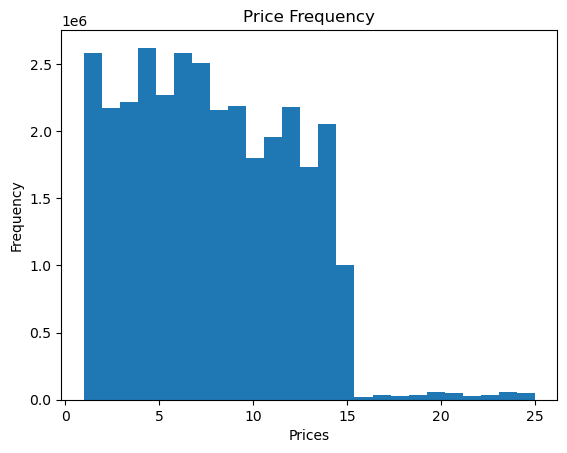

In [46]:
# cheking updated histogram after adhoc cleaning
hist = instacart_merged['prices'].plot.hist(bins = 25)

plt.title('Price Frequency')
plt.xlabel('Prices')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [42]:
# Lets change those those 100+ to Nan
instacart_merged.loc[instacart_merged['prices'] >100, 'prices'] = np.nan

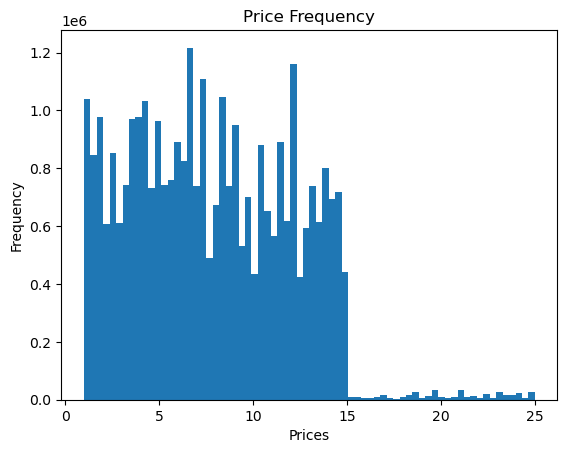

In [48]:
# cheking updated histogram after adhoc cleaning 70 bins 
hist_2 = instacart_merged['prices'].plot.hist(bins = 70)

plt.title('Price Frequency')
plt.xlabel('Prices')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### Scatterplot chart

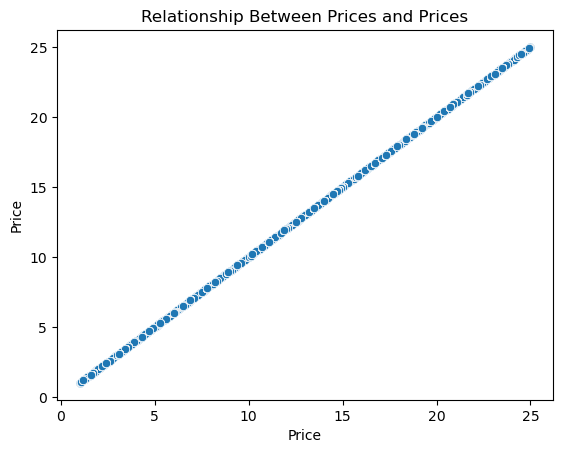

In [52]:
s1 = sns.scatterplot(x = 'prices', y = 'prices',data = instacart_merged)

plt.title('Relationship Between Prices and Prices')
plt.xlabel('Price')
plt.ylabel('Price')

# Show the plot
plt.show()

### Line chart - 30% subset

In [12]:
# Create a list holding True/False values to the test 70/30 split
np.random.seed(4)
dev = np.random.rand(len(instacart_merged)) <= 0.7

In [14]:
# Store 30% of the sample in the dataframe small
small = instacart_merged[~dev]

In [15]:
# lets reduce dataframe to have only colums that we need
df_2 = small[['orders_day_of_week','prices']]

Text(0.5, 1.0, 'Relationship Between Orders day of week and Prices')

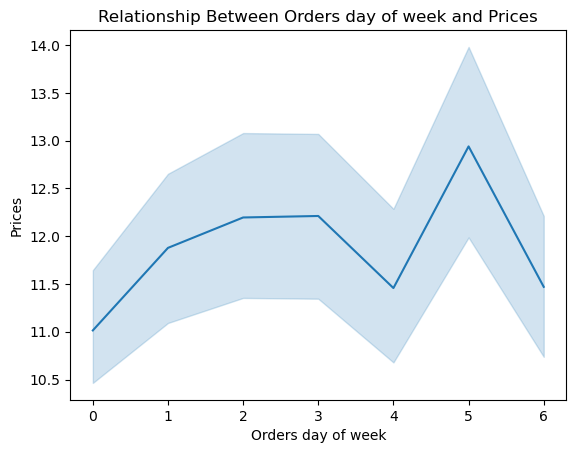

In [20]:
# GO with the chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

# Adding labels and title
plt.xlabel('Orders day of week')
plt.ylabel('Prices')
plt.title('Relationship Between Orders day of week and Prices')

# You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.
### In a markdown cell beneath your histogram, describe what the histogram demonstrates.

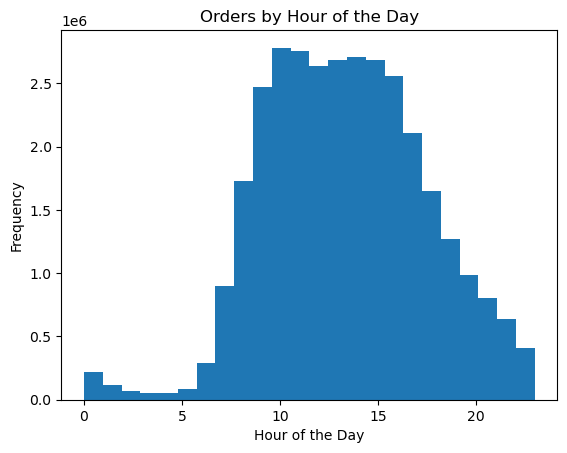

In [117]:
orders_by_hour_plot = instacart_merged['order_hour_of_day'].plot.hist(bins=24)

plt.title('Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')

# Show the plot
plt.show()

### 🛒 Order Distribution by Hour of the Day

The histogram shows the number of orders placed at different hours of the day. Key observations:

- The highest number of orders occurs between 9 and 16, indicating peak shopping hours.
- The lowest number of orders happens at night, especially between 2 and 6.

# The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

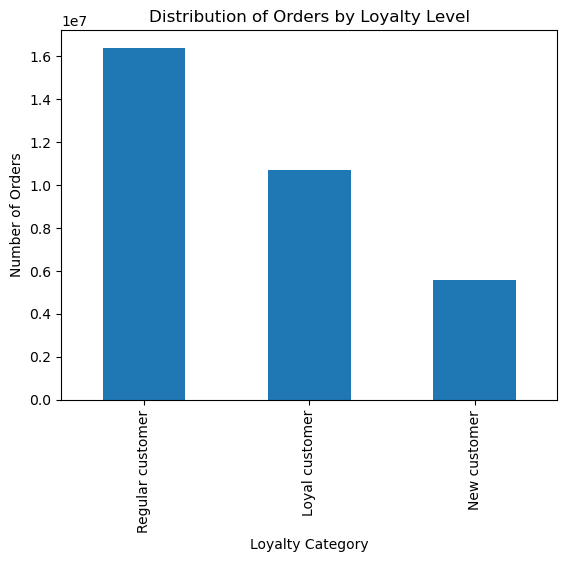

In [123]:
# Create the bar chart and store it in a variable
loyalty_plot = loyalty_counts.plot.bar()

# Add titles
plt.title('Distribution of Orders by Loyalty Level')
plt.xlabel('Loyalty Category')
plt.ylabel('Number of Orders')

# Show the plot
plt.show()

# Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

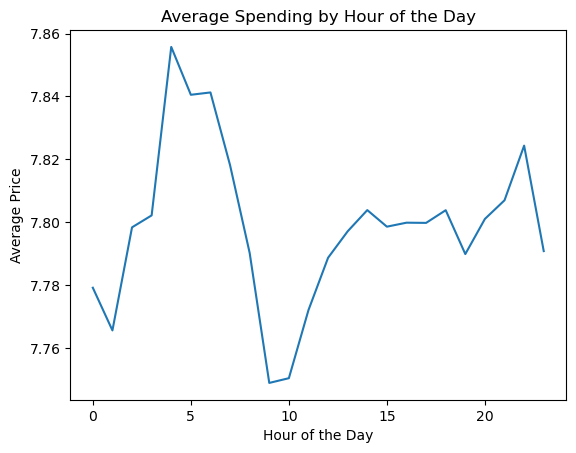

In [137]:
# Creating the line chart and storing it in a variable
spending_plot = df_5.groupby('order_hour_of_day')['prices'].mean().plot()

# Adding labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Average Price')
plt.title('Average Spending by Hour of the Day')

# Show the plot
plt.show()

# Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
### In a markdown cell beneath your line chart, describe what the line chart shows.

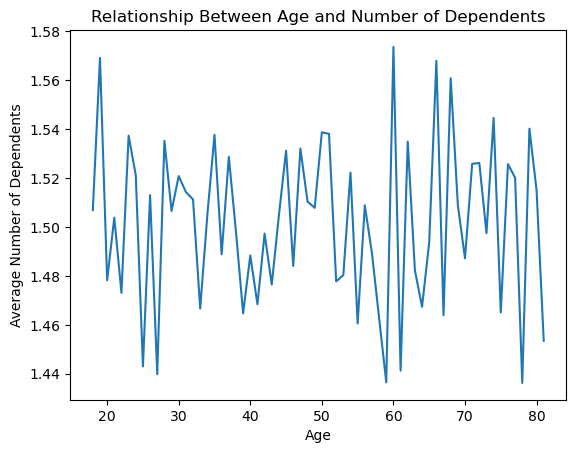

In [149]:
# Grouping data: average number of dependents per age
age_dependents = instacart_merged.groupby('age')['num_dependents'].mean()

# Creating the plot
plt.figure()  # Create a new figure
plt.plot(age_dependents)

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Average Number of Dependents')
plt.title('Relationship Between Age and Number of Dependents')

# Storing the figure in a variable
age_plot = plt.gcf()  # I can call age_plot.figure later

# Displaying the plot
plt.show()

### 👨‍👩‍👧‍👦 Relationship Between Age and Number of Dependents

The line chart shows how the number of dependents varies with customer age. Key insights:

- Younger customers (20s-30s) generally have fewer dependents.
- Customers in their mid-30s to 50s have the highest number of dependents.
- Older customers (60+) tend to have fewer dependents, possibly because their children have grown up.

# You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.
### In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

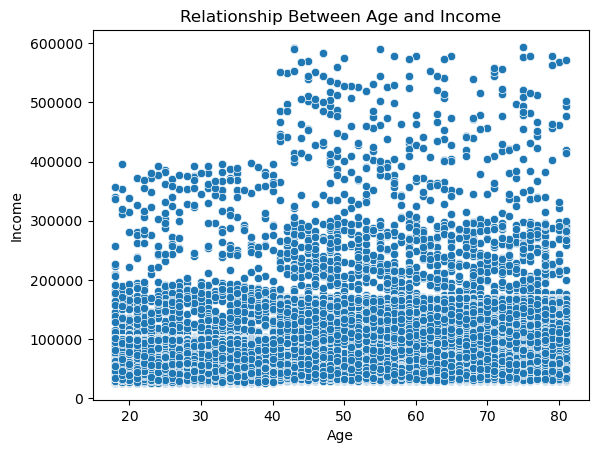

In [8]:
# Create the scatter plot
s2 = sns.scatterplot(x=instacart_merged['age'], y=instacart_merged['income'])

# Store the figure
s2_fig = s2.get_figure()  # I can call s2_fig.figure later

# Adding labels and title
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Relationship Between Age and Income')

# Show the plot
plt.show()


### 💰 Relationship Between Age and Income

The scatterplot explores the relationship between customer age and income. Key observations:

- There is **no strong linear correlation** between age and income.
- Income levels are **highly variable** across all ages.
- However, there may be a **slight trend** where older customers tend to have higher incomes, with a visible clustering around mid-age ranges.
- The distribution suggests that income may be influenced by other factors beyond age alone.

# Export your visualizations as “.png” files in your relevant project folder.

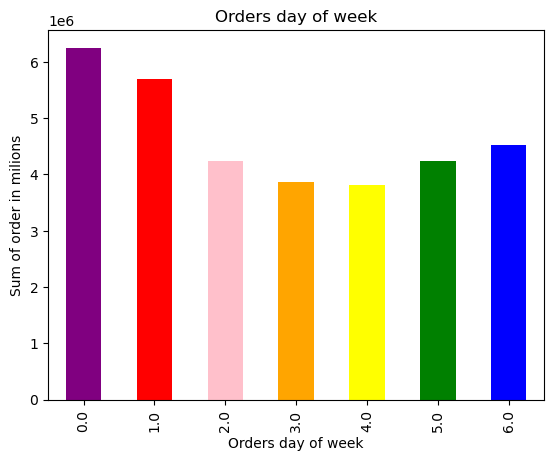

In [34]:
bar.figure

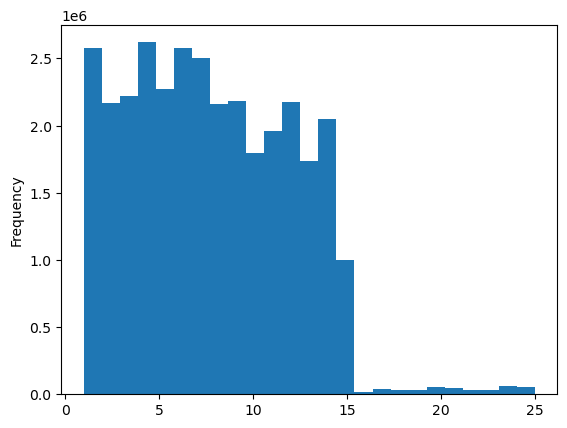

In [127]:
hist.figure

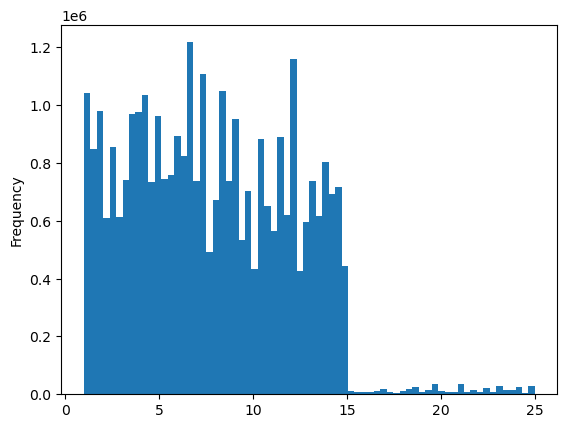

In [131]:
hist_2.figure

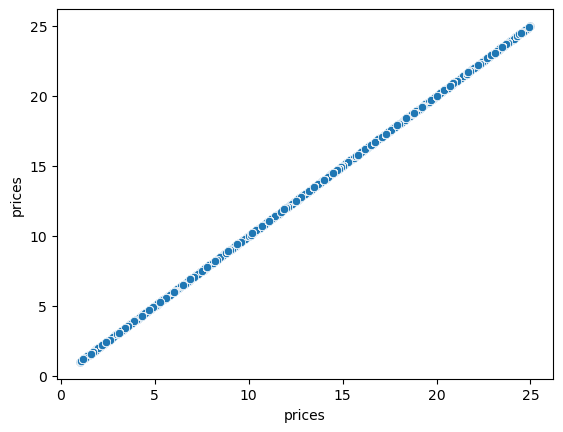

In [164]:
s1.figure

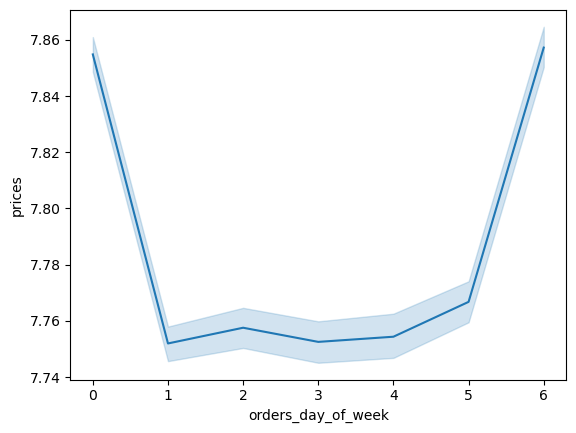

In [134]:
line.figure

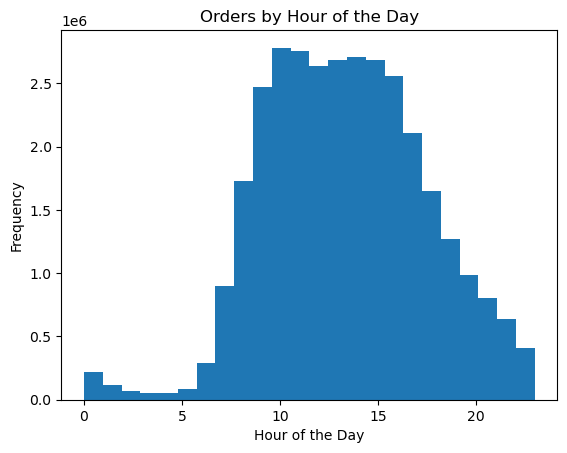

In [119]:
orders_by_hour_plot.figure

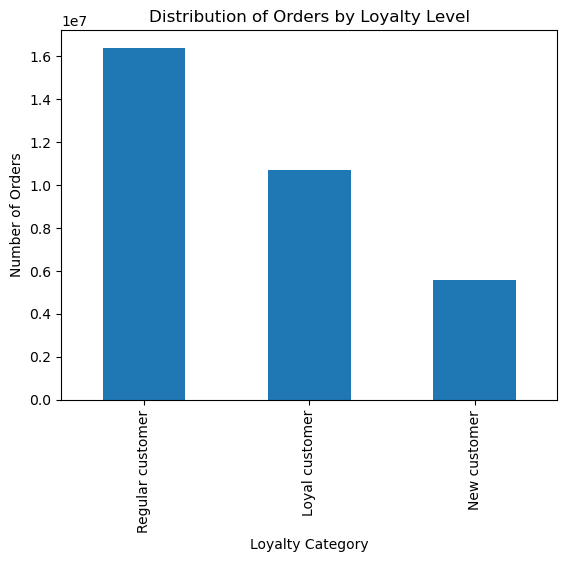

In [125]:
loyalty_plot.figure

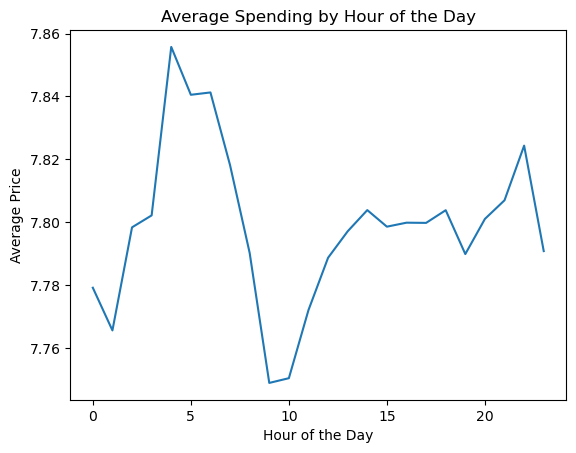

In [139]:
spending_plot.figure

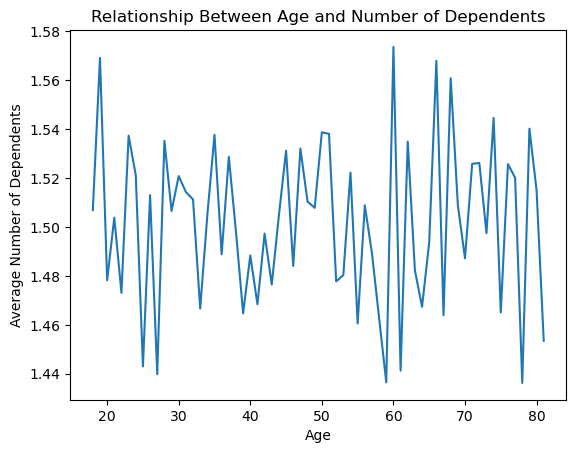

In [153]:
age_plot.figure

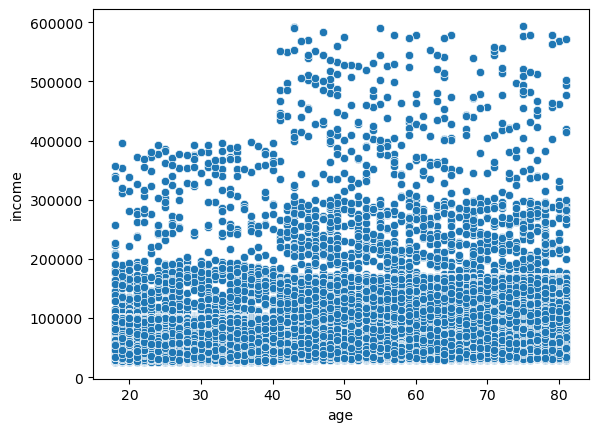

In [171]:
s2_fig.figure

In [173]:
# Exporting figures to an image
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar.png'))
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist.png'))
hist_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_2.png'))
s1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 's1.png'))
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line.png'))
orders_by_hour_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_by_hour_plot.png'))
loyalty_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_plot.png'))
spending_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'spending_plot.png'))
age_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_plot.png'))
s2_fig.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 's2_fig.png'))